In [3]:
cd C:\Users\Администратор.WIN-U1NLG8MM702\Downloads

C:\Users\Администратор.WIN-U1NLG8MM702\Downloads


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json',lines=True)

In [6]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [8]:
df.dtypes

is_sarcastic     int64
headline        object
article_link    object
dtype: object

In [9]:
df.shape #28619 строк и 3 столбцов

(28619, 3)

In [10]:
df.is_sarcastic.unique() #array([1,  0])

array([1, 0], dtype=int64)

In [11]:
df.describe() #статистики по всем числовым переменным

,is_sarcastic
count,28619.000000
mean,0.476397
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
df.is_sarcastic.value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [13]:
df['source'] = df.article_link.apply(lambda x: x.split('.')[1])
df = df.drop('article_link', axis=1)
df.shape

(28619, 3)

In [14]:
df.head()

,is_sarcastic,headline,source
0,1,thirtysomething scientists unveil doomsday clo...,theonion
1,0,dem rep. totally nails why congress is falling...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,huffingtonpost
3,1,inclement weather prevents liar from getting t...,theonion
4,1,mother comes pretty close to using word 'strea...,theonion


In [15]:
df.source.unique()

array(['theonion', 'huffingtonpost'], dtype=object)

Classes of is_sarcastic column are well-balanced and there are no nulls

In [16]:
df.source.value_counts()

huffingtonpost    14985
theonion          13634
Name: source, dtype: int64

In [17]:
all_words = df['headline'].str.split(expand=True).unstack().value_counts()

In [18]:
all=pd.DataFrame(all_words).reset_index()

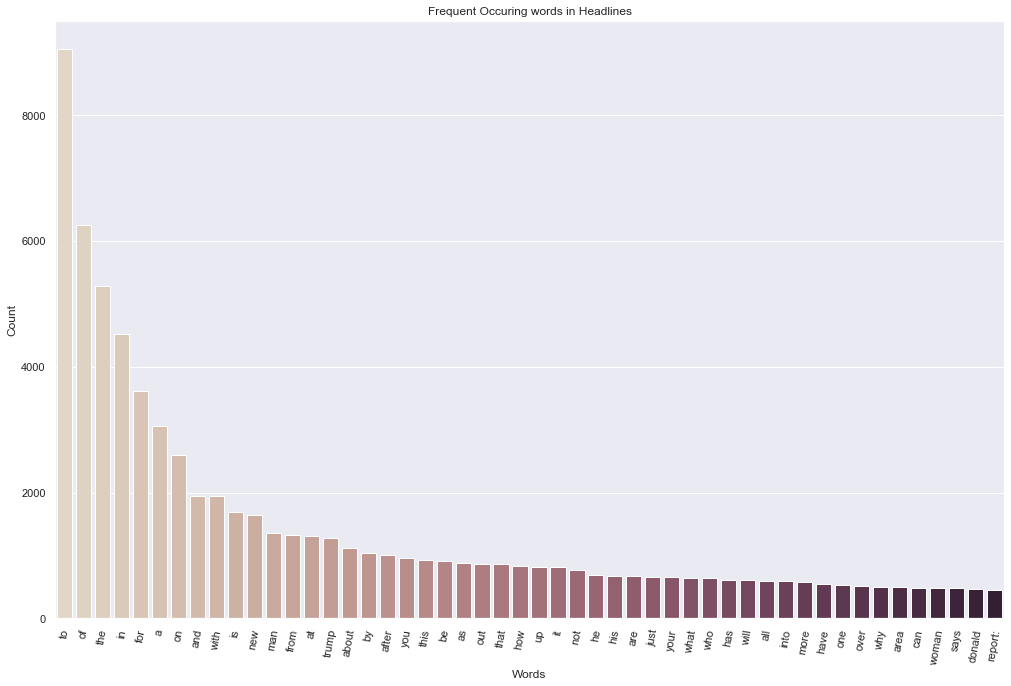

In [19]:
sns.set(rc={'figure.figsize':(17,11)})
sns.barplot(x=all['index'][0:50], y=all[0][0:50], data=all,palette="ch:.25")
plt.xlabel('Words')  # Add an x-label to the axes.
plt.ylabel('Count')  # Add a y-label to the axes.
plt.title("Frequent Occuring words in Headlines") 
plt.xticks(rotation=80);

In [20]:
all_words = df['headline'].str.split(expand=True).unstack().value_counts()

In [21]:
non_sarc=pd.DataFrame(df[df['is_sarcastic']==0]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

In [22]:
sarc=pd.DataFrame(df[df['is_sarcastic']==1]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

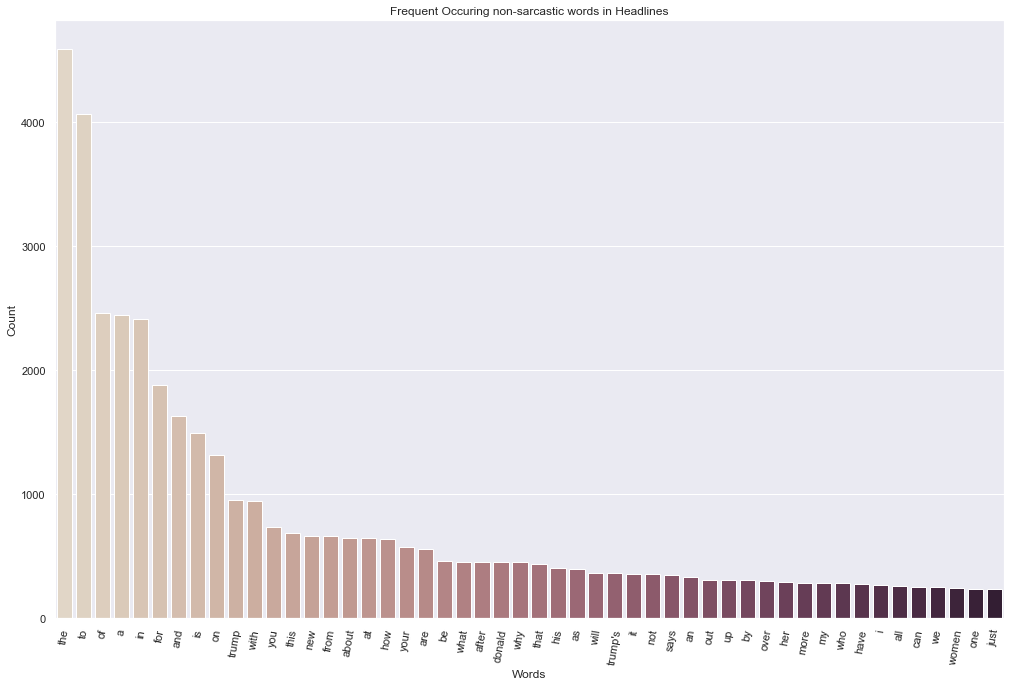

In [23]:
sns.set(rc={'figure.figsize':(17,11)})
sns.barplot(x=non_sarc['index'][0:50], y=non_sarc[0][0:50], data=non_sarc,palette="ch:.25")
plt.xlabel('Words')  # Add an x-label to the axes.
plt.ylabel('Count')  # Add a y-label to the axes.
plt.title("Frequent Occuring non-sarcastic words in Headlines") 
plt.xticks(rotation=80);

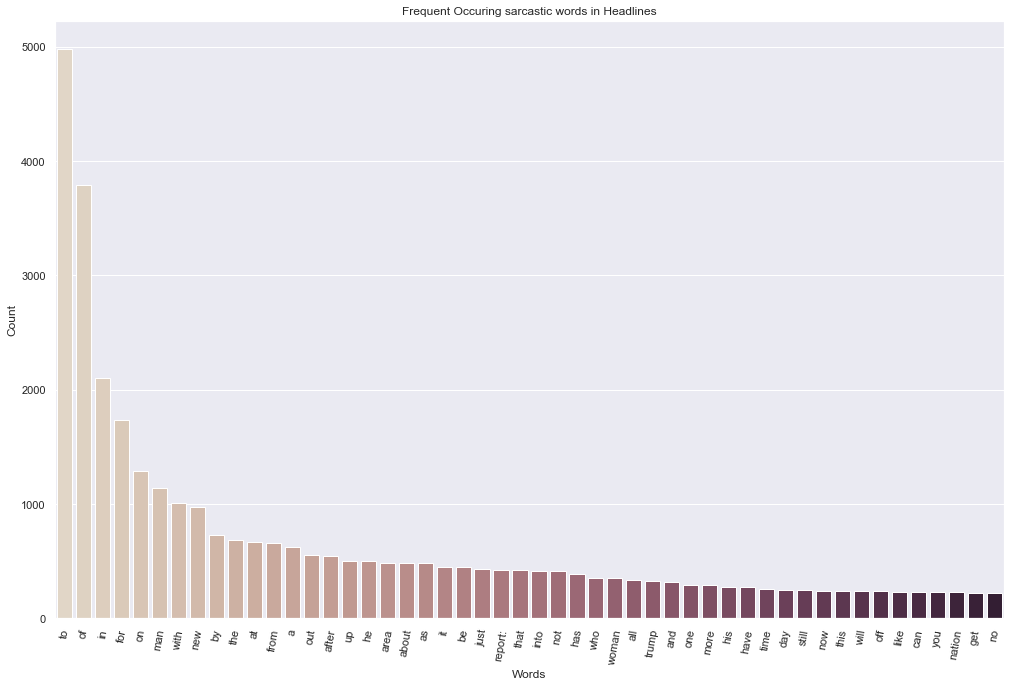

In [24]:
sns.set(rc={'figure.figsize':(17,11)})
sns.barplot(x=sarc['index'][0:50], y=sarc[0][0:50], data=sarc,palette="ch:.25")
plt.xlabel('Words')  # Add an x-label to the axes.
plt.ylabel('Count')  # Add a y-label to the axes.
plt.title("Frequent Occuring sarcastic words in Headlines") 
plt.xticks(rotation=80);

#### One more way to get words

In [25]:
import nltk
nltk.download('stopwords')
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to C:\Users\Администратор.WI
[nltk_data]     N-U1NLG8MM702\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Администратор.WIN-
[nltk_data]     U1NLG8MM702\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Администратор.WIN-U1
[nltk_data]     NLG8MM702\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [202]:
from nltk.corpus import wordnet

In [33]:
sar_tokens = df[df['is_sarcastic'] == 1]['headline'].apply(lambda x: nltk.word_tokenize(x))  #don't like it because of "'s'" and so on

In [28]:
nonsar_tokens = df[df['is_sarcastic'] == 0]['headline'].apply(lambda x: nltk.word_tokenize(x))

#### Stop words removal

In [86]:
stopwords = nltk.corpus.stopwords.words('english')

In [124]:
sarc2=[each_word.lower() for each_word in sarc['index']] #lowcase

In [126]:
sarc_nostop = [word for word in sarc2 if word not in stopwords]

In [136]:
non_sarc2=[each_word.lower() for each_word in non_sarc['index']]

In [137]:
non_sarc_nostop = [word for word in non_sarc2 if word not in stopwords]

### Visualize with WordCloud

In [79]:
from wordcloud import WordCloud, ImageColorGenerator

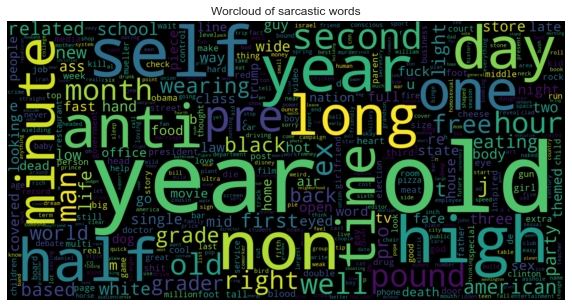

In [138]:
plt.figure(figsize = (10,10))
wc = WordCloud(width = 2000 , height = 1000 , max_words = 500).generate(' '.join(word for word in sarc_nostop))
plt.axis("off")
plt.title('Worcloud of sarcastic words')
plt.imshow(wc , interpolation = 'bilinear')

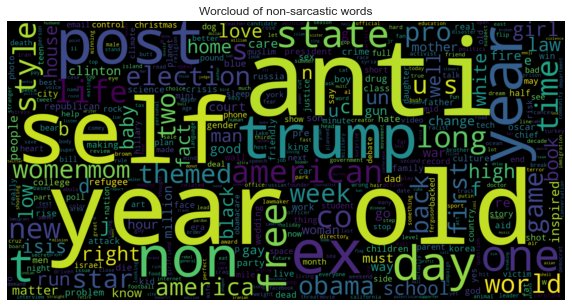

In [139]:
plt.figure(figsize = (10,10))
wc = WordCloud(width = 2000 , height = 1000 , max_words = 500).generate(' '.join(word for word in non_sarc_nostop))
plt.axis("off")
plt.title('Worcloud of non-sarcastic words')
plt.imshow(wc , interpolation = 'bilinear')

### Comparison of the length of sarcastic and non-sarcastic headlines

In [167]:
df['text_len'] = df['headline'].apply(lambda x: len(x.split(' ')))

In [168]:
df[df['text_len']>140]

,is_sarcastic,headline,source,text_len
7302,1,hot wheels ranked number one toy for rolling d...,theonion,151


In [164]:
df['headline'][7302]

'hot wheels ranked number one toy for rolling down ramp, knocking over dominoes that send marble down a funnel, dropping onto teeter-totter that yanks on string, causing pulley system to raise wooden block, propelling series of twine rollers that unwind spring, launching tennis ball across room, inching tire down slope until it hits power switch, activating table fan that blows toy ship with nail attached to it across kiddie pool, popping water balloon that fills cup, weighing down lever that forces basketball down track, nudging broomstick on axis to rotate, allowing golf ball to roll into sideways coffee mug, which tumbles down row of hardcover books until handle catches hook attached to lever that causes wooden mallet to slam down on serving spoon, catapulting small ball into cup attached by ribbon to lazy susan, which spins until it pushes d battery down incline plane, tipping over salt shaker to season omelet'

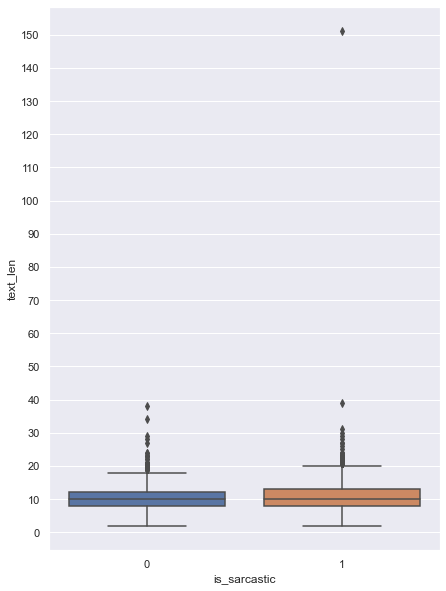

In [179]:
plt.figure(figsize = (7 ,10))
sns.boxplot(y='text_len', x="is_sarcastic", data=df)
y=df['text_len']
plt.yticks(np.arange(0, max(y), 10));

There are some diffencies between sarcastic and non-sarcastic classes in the length of headlines. Non-sarcastic headlines are more similar in the length, whereas the longest headings tend to be satirical. 

### X and Y preparing

Parse the data removing stopwords and non-alpha-numeric characters and words containing them from the headlines

In [203]:
import re
def parser(x):
    x = re.sub('[^a-z\s]', '', x.lower())  #drop any symbol except a-z
    x = [w for w in x.split() if w not in set(stopwords)]
    x = [w for w in x if wordnet.synsets(w)]
    return ' '.join(x)

df['headline'] = df.headline.apply(lambda x: parser(x))

In [219]:
X = df['headline']
y = df.is_sarcastic

In [220]:
# 2. Split into Training and Test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [223]:
from sklearn.feature_extraction.text import CountVectorizer

In [224]:
cv = CountVectorizer(ngram_range=(1,3))
X_cv_train = cv.fit_transform(X_train)
X_cv_test = cv.transform(X_test)

### DecisionTreeClassifier

In [195]:
from sklearn.tree import DecisionTreeClassifier

In [226]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_cv_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

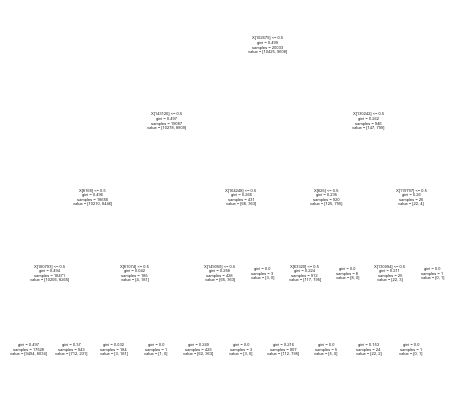

In [237]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.savefig('hey.pdf')
plt.show()

In [271]:
from sklearn.metrics import confusion_matrix, classification_report

In [241]:
y_pred = tree_model.predict(X_cv_test)
test = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(test, predictions)

array([[4475,   85],
       [3462,  564]], dtype=int64)

In [244]:
from sklearn.metrics import accuracy_score, f1_score

In [245]:
print('accuracy:', accuracy_score(y_test,y_pred))
print('f1-score:', f1_score(y_test,y_pred))

accuracy: 0.586885627766131
f1-score: 0.24128342245989307


In [284]:
acc_tree = accuracy_score(y_test,y_pred)

### Logistic regression

In [246]:
from sklearn.linear_model import LogisticRegression

In [247]:
logreg = LogisticRegression()
logreg.fit(X_cv_train, y_train)

LogisticRegression()

In [258]:
logreg.score(X_cv_train, y_train)

0.9974542005690611

In [249]:
y_pred_logr = logreg.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_logr))
print('f1-score:', f1_score(y_test,y_pred_logr))

accuracy: 0.7890752387607733
f1-score: 0.7601642166600449


In [285]:
acc_logr = accuracy_score(y_test,y_pred_logr)

### SVM

In [250]:
from sklearn import svm

In [253]:
model = svm.SVC(kernel='linear', gamma=1) 
model.fit(X_cv_train, y_train)

SVC(gamma=1, kernel='linear')

In [255]:
model.score(X_cv_train, y_train)

0.9993011530973893

In [257]:
y_pred_svm= model.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_svm))
print('f1-score:', f1_score(y_test,y_pred_svm))

accuracy: 0.7795248078266946
f1-score: 0.746348653356559


In [286]:
acc_svm = accuracy_score(y_test,y_pred_svm)

### Random Forest

In [259]:
from sklearn.ensemble import RandomForestClassifier

In [263]:
forest = RandomForestClassifier (criterion='gini',
                                n_estimators=12, 
                                random_state=1)
forest.fit(X_cv_train, y_train)

RandomForestClassifier(n_estimators=12, random_state=1)

In [264]:
forest.score(X_cv_train, y_train)

0.9840762741476564

In [265]:
y_pred_forest= forest.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_forest))
print('f1-score:', f1_score(y_test,y_pred_forest))

accuracy: 0.726764500349406
f1-score: 0.6424870466321244


In [287]:
acc_rf = accuracy_score(y_test,y_pred_forest)

### Naive Bayes

In [266]:
from sklearn.naive_bayes import MultinomialNB

In [268]:
nb=MultinomialNB()
nb.fit(X_cv_train, y_train)

MultinomialNB()

In [269]:
nb.score(X_cv_train, y_train)

0.9948584835022213

In [270]:
y_pred_nb= nb.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_nb))
print('f1-score:', f1_score(y_test,y_pred_nb))

accuracy: 0.7954810156068017
f1-score: 0.7821880426693127


In [272]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      4560
           1       0.78      0.78      0.78      4026

    accuracy                           0.80      8586
   macro avg       0.79      0.79      0.79      8586
weighted avg       0.80      0.80      0.80      8586



In [288]:
acc_nb = accuracy_score(y_test,y_pred_nb)

### kNN

In [273]:
from sklearn.neighbors import KNeighborsClassifier

In [282]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_cv_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [283]:
y_pred_knn= knn.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_knn))
print('f1-score:', f1_score(y_test,y_pred_knn))

accuracy: 0.5581178662939669
f1-score: 0.18966253737718924


In [289]:
acc_knn = accuracy_score(y_test,y_pred_knn)

### Comparison of models' accuracy

In [307]:
models = ['DesicionTree','LogReg','SVM', 'RandomForest', 'NaiveBayes', 'kNN']
col = [acc_tree, acc_logr, acc_svm, acc_rf, acc_nb, acc_knn]
data = {'Models':models,'Accuracy':col}
graph_df = pd.DataFrame(data)
graph_df

,Models,Accuracy
0,DesicionTree,0.586886
1,LogReg,0.789075
2,SVM,0.779525
3,RandomForest,0.726765
4,NaiveBayes,0.795481
5,kNN,0.558118


In [317]:
graph_df = graph_df.sort_values(by=['Accuracy'], axis = 0, ascending=False)

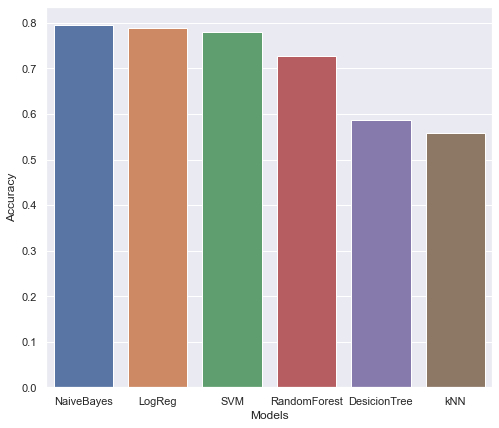

In [338]:
fig, ax = plt.subplots()
sns.barplot(x=graph_df['Models'], y=graph_df['Accuracy'], data=graph_df);